In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

In [3]:
#Išssilavinimo pakopos yraG1,G2,G3 ir G4. Parašykite ciklą, kuris išspausdintų pakopos kodą ir spalio atlyginų medianą bei vidurkį,
#atskirai vyrams, atskirai moterims.
import pandas as pd

# Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2014.csv')

# Ivedu išsilavinimo lygmenis
edu = ['G1', 'G2', 'G3', 'G4']

# Sukurti tuščią sąrašą rezultatams saugoti
results = []

# Iteruoti per kiekvieną išsilavinimo lygmenį ir lytį
for e in edu:
    for lytis in ['M', 'F']:
        # Filtruoti pagal išsilavinimą ir lytį
        df_filtered = df[(df['issilavinimas'] == e) & (df['lytis'] == lytis)]
        
        # Apskaičiuoti medianą ir vidurkį
        median_salary = round(df_filtered['bdu_spalio'].median(),2)
        mean_salary = round(df_filtered['bdu_spalio'].mean(),2)
        
        # Pridėti rezultatus į sąrašą
        results.append({'issilavinimas': e, 'lytis': lytis, 'vidutinis darbo uzmokestis': mean_salary, 'mediana': median_salary})

# Konvertuoti rezultatus į DataFrame
ATS = pd.DataFrame(results)

# Išvesti rezultatus
print(ATS)

  issilavinimas lytis  vidutinis darbo uzmokestis  mediana
0            G1     M                     1762.30  1485.66
1            G1     F                     1406.67  1256.50
2            G2     M                     2129.49  1884.00
3            G2     F                     1571.05  1395.00
4            G3     M                     2900.46  2500.00
5            G3     F                     2190.46  1974.00
6            G4     M                     4158.56  3400.00
7            G4     F                     3039.67  2691.84


In [9]:
#Išssilavinimo pakopos yraG1,G2,G3 ir G4. Parašykite ciklą, kuris išspausdintų pakopos kodą ir spalio atlyginų medianą bei vidurkį,
#atskirai vyrams, atskirai moterims. SIUO ATVEJU REZULTATUS SURUSIUOJU PAGAL LYTI IR ISSILAVINIMA
import pandas as pd

# Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2014.csv')

# Įvedame išsilavinimo lygmenis
edu = ['G1', 'G2', 'G3', 'G4']

# Sukurti tuščią sąrašą rezultatams saugoti
results = []

# Iteruoti per kiekvieną išsilavinimo lygmenį ir lytį
for e in edu:
    for lytis in ['M', 'F']:
        # Filtruoti pagal išsilavinimą ir lytį
        df_filtered = df[(df['lytis'] == lytis) & (df['issilavinimas'] == e)]
        
        # Apskaičiuoti medianą ir vidurkį
        median_salary = round(df_filtered['bdu_spalio'].median(), 2)
        mean_salary = round(df_filtered['bdu_spalio'].mean(), 2)
        
        # Pridėti rezultatus į sąrašą
        # Pridėti rezultatus į sąrašą
        results.append({'issilavinimas': e, 'lytis': lytis, 'vid. darbo uzmokestis': mean_salary, 'mediana': median_salary})

# Konvertuoti rezultatus į DataFrame
ATS = pd.DataFrame(results)
# Surūšiuoti pagal lytį, o tada pagal išsilavinimą
ATS = ATS.sort_values(by=['lytis', 'issilavinimas'])
# Išvesti rezultatus
print(ATS)

  issilavinimas lytis  vid. darbo uzmokestis  mediana
1            G1     F                1406.67  1256.50
3            G2     F                1571.05  1395.00
5            G3     F                2190.46  1974.00
7            G4     F                3039.67  2691.84
0            G1     M                1762.30  1485.66
2            G2     M                2129.49  1884.00
4            G3     M                2900.46  2500.00
6            G4     M                4158.56  3400.00


In [12]:
#Destytojo sprendimas. Siuo atveju nesukurta jokia nauja lentele,
# bet viskas atspausdinama ekrane. Kiekvieno ciklo rezultatas yra spausdinamas
edu = ['G1','G2', 'G3', 'G4']

for e in edu:
    fv = df.query(expr='issilavinimas == @e and lytis == "F"')['bdu_spalio'].mean()
    fm = df.query(expr='issilavinimas == @e and lytis == "F"')['bdu_spalio'].median()
    print(f'{e:5}|{fv:5.2f}|{fm:5.2f}|{"Mot":5}')

for e in edu:
    fv = df.query(expr='issilavinimas == @e and lytis == "M"')['bdu_spalio'].mean()
    fm = df.query(expr='issilavinimas == @e and lytis == "M"')['bdu_spalio'].median()
    print(f'{e:5}|{fv:5.2f}|{fm:5.2f}|{"Vyr":5}')

G1   |1406.67|1256.50|Mot  
G2   |1571.05|1395.00|Mot  
G3   |2190.46|1974.00|Mot  
G4   |3039.67|2691.84|Mot  
G1   |1762.30|1485.66|Vyr  
G2   |2129.49|1884.00|Vyr  
G3   |2900.46|2500.00|Vyr  
G4   |4158.56|3400.00|Vyr  


In [ ]:
#Pvz. kaip naudoti value_caount, rusiuoti duomenis didejimo tvarka, bei paversti duomeinis i sarasa.
edus = df['issilavinimas'].value_counts().sort_index(ascending=True).index.to_list()
print(edus)
for e in edus:
d = df.query('issilavinimas == @e')['bdu_spalio'].mean()
print(e, d)

In [22]:
#Parašykite ciklą, kuris surašytų atlyginimų vidurkius bei medianas
# pagal amžiaus grupes (2014 metams, eurais)
# amžiaus grupes gaukite naudodamiesi value_counts()
# tvarkingesniam atvaizdavimui pasinaudokite f-strings
# išvestyje pridėkite dar ir skirtumą tarp vidurkio ir medianos (vidurkis-mediana)

# Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2014.csv')
#Atrenkame amziaus grupes, isdestome jas didejimo tvarka, amziaus grupes surasome 
# i "lista', nors cia tai nebutina"
age = df['amzius'].value_counts().sort_index(ascending=True).index.to_list()

#Su kiekviena iteracija nustatome parametrus, kurie reikalingi ir juos kiekviena karta atspausdiname ekrane
#atskiros lenteles nekuriame.
for e in age:
    vidurkis= round(df.query('amzius == @e')['bdu_spalio'].mean()/3.4528,2)
    mediana= round(df.query('amzius == @e')['bdu_spalio'].median()/3.4528,2)
    delta= round(vidurkis-mediana,2)
    print(f'{e:^8}|{vidurkis:^8}|{mediana:^8}|{delta:^8}|')

 14-19  | 361.95 | 351.31 | 10.64  |
 20-29  | 608.5  | 533.77 | 74.73  |
 30-39  | 795.91 | 651.07 | 144.84 |
 40-49  | 700.62 | 560.41 | 140.21 |
 50-59  | 666.76 | 543.09 | 123.67 |
  60+   | 626.85 | 512.77 | 114.08 |


M 22586
F 22366


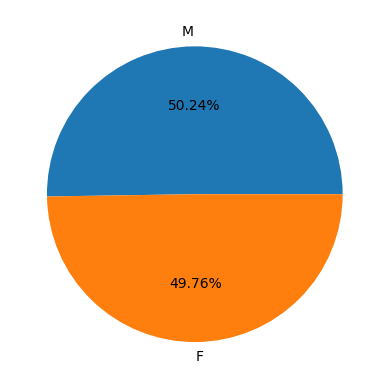

In [25]:
# value_counts() ir pie plot:
# kiek procentų buvo vyrų, moterų 2014 metais?
# value_counts()
import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2014.csv')
c = df['lytis'].value_counts()
lytys = c.index
kiekiai = c.values

for li, ci in zip(lytys, kiekiai):
    print(li, ci)

plt.pie(x=c.values, labels=c.index, autopct='%.2f%%')

plt.show()


50-59 10968
40-49 10947
30-39 9747
20-29 9015
60+ 3928
14-19 347


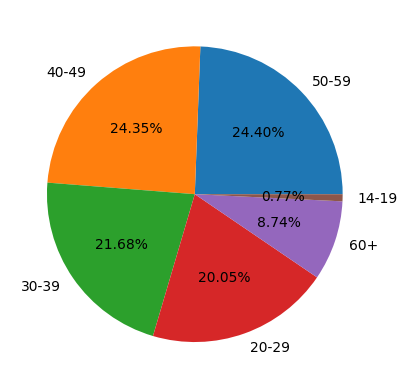

In [26]:
# value_counts() ir pie plot:
# kiek procentų buvo iš kiekvienos amžiaus grupės?
import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2014.csv')
c = df['amzius'].value_counts()
amzius = c.index
kiekiai = c.values

for li, ci in zip(amzius, kiekiai):
    print(li, ci)

plt.pie(x=c.values, labels=c.index, autopct='%.2f%%')

plt.show()

50-59 22059
40-49 12178
30-39 8999
20-29 1716


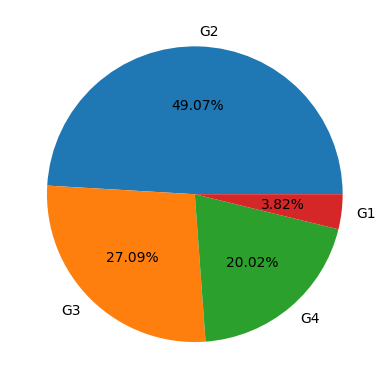

In [29]:
#value_counts() ir pie plot:
# kiek procentų buvo iš kiekvienos išsilavinimo pakopos?
import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2014.csv')
c = df['issilavinimas'].value_counts()
issilavinimas = c.index
kiekiai = c.values

for li, ci in zip(amzius, kiekiai):
    print(li, ci)

plt.pie(x=c.values, labels=c.index, autopct='%.2f%%')

plt.show()

50-59 30542
40-49 14410


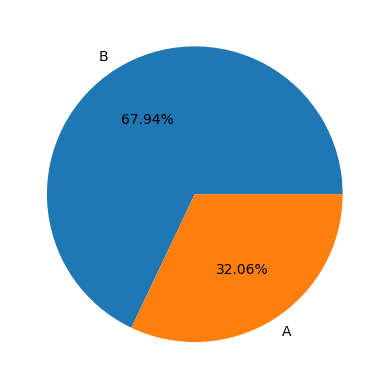

In [30]:
#kiek respondentų buvo iš privataus (B) bei viešojo (A) sektoriaus? 
# (stulpelis: nuosavybe)
import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2014.csv')
c = df['nuosavybe'].value_counts()
nuosavybe = c.index
kiekiai = c.values

for li, ci in zip(amzius, kiekiai):
    print(li, ci)

plt.pie(x=c.values, labels=c.index, autopct='%.2f%%')

plt.show()

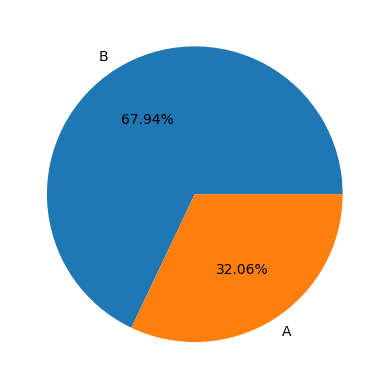

In [31]:
#kiek respondentų buvo iš privataus (B) bei viešojo (A) sektoriaus? 
# (stulpelis: nuosavybe). Padaryta,kad nebutu spausdinami duomenys, 
# tik butu braizoma
import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2014.csv')

# Gauti A ir B sektoriaus kiekis
c = df['nuosavybe'].value_counts()

# Sukurti pie grafiką
plt.pie(x=c.values, labels=c.index, autopct='%.2f%%')

# Rodyti grafiką
plt.show()

Unikalios 'im_dydis' reikšmės: ['1_49' 'GT_250' '50_249']


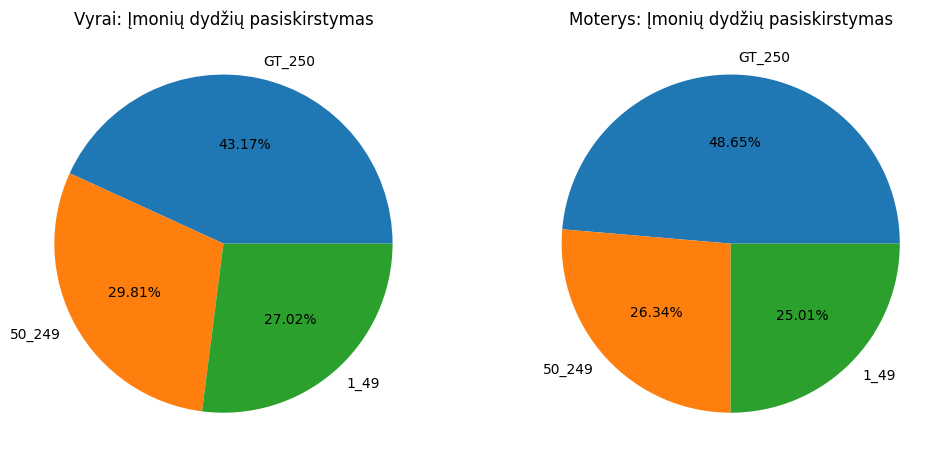

In [35]:
# kiek procentaliai buvo vyrų, moterų iš didelių, vidutinių, mažų įmonių? 
# (Stulpelis im_dydis, 
# du pie plot'ai, vienas vyrams, kitas moterims)
import pandas as pd
import matplotlib.pyplot as plt

# Nuskaitome failą
df = pd.read_csv('../../DATA/DUS2014.csv')

# Patikriname unikalių įmonių dydžių reikšmes
dydis = df['im_dydis'].unique()
print("Unikalios 'im_dydis' reikšmės:", dydis)

# Sukuriame subplots, kad galėtume turėti 2 pie grafikus
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Pie grafikas vyrams
fv = df[df['lytis'] == "M"]['im_dydis'].value_counts(normalize=True)
ax1.pie(x=fv.values, labels=fv.index, autopct='%.2f%%')
ax1.set_title('Vyrai: Įmonių dydžių pasiskirstymas')

# Pie grafikas moterims
fm = df[df['lytis'] == "F"]['im_dydis'].value_counts(normalize=True)
ax2.pie(x=fm.values, labels=fm.index, autopct='%.2f%%')
ax2.set_title('Moterys: Įmonių dydžių pasiskirstymas')

# Rodyti grafikus
plt.show()